# Setup

In [16]:
import numpy as np
import seaborn as sns
import pandas as pd
import glob

# Functions

In [17]:
def read_csv(filepath, cols, names):
    df = pd.read_csv(filepath, usecols = cols, names = names, header = None)
    df = df.drop([0], axis = 0) # Remove first row (headers)
    df = df.astype('float64') # Cast data to floats
    
    return df

In [210]:
def get_class_df(file_path, df):
    class_name = '_'.join(file_path.split('\\')[-1].split('_')[:-1])

    return pd.DataFrame({'class': [class_name for _ in range(len(df))]})

In [381]:
def read_acc_mag_csvs():
    X = pd.DataFrame()
    y = pd.DataFrame(columns=['class'])
    
    for file in glob.glob('data/cleaned/acc_mag/*.csv'):

        if 'acc' in file.split('\\')[-1]:
            mag_file = file.replace(file.split('\\')[-1], file.split('\\')[-1].replace('acc', 'mag'))
            
            df_acc = read_csv(file, [1,2,3], ['ax', 'ay', 'az'])
            df_mag = read_csv(mag_file, [1,2,3], ['mx', 'my', 'mz'])
            
            df = pd.concat([df_acc, df_mag], axis=1, join='inner')
            X = X.append(df, ignore_index=True)            

            y = y.append(get_class_df(file, df), ignore_index=True)

    return X, y

In [382]:
def read_acc_gyro_csvs():
    X = pd.DataFrame()
    y = pd.DataFrame(columns=['class'])
    
    for file in glob.glob('data/cleaned/acc_gyro/*.csv'):

        if 'acc' in file.split('\\')[-1]:
            gyro_file = file.replace(file.split('\\')[-1], file.split('\\')[-1].replace('acc', 'gyro'))
            
            df_acc = read_csv(file, [1,2,3], ['ax', 'ay', 'az'])
            df_gyro = read_csv(gyro_file, [1,2,3], ['gx', 'gy', 'gz'])
            
            df = pd.concat([df_acc, df_gyro], axis=1, join='inner')
            X = X.append(df, ignore_index = True)
            
            y = y.append(get_class_df(file, df), ignore_index=True)
        
    return X, y

In [253]:
def get_filepaths_from_folder(path, filter=''):
    files = []
    
    for file in glob.glob(path + '*'):
        if filter in file.split('\\')[-1]:
            files.append(file)
        
    return files

# Prepare data

## Trim data

### Functions

In [309]:
def inspect_acc_gyro_data(df1, df2):
    df1.plot(kind = "line", title='Inspection of raw acc data', figsize=(15,3))
    df2.plot(kind = "line", title='Inspection of raw gyro data', figsize=(15,3))

In [310]:
def remove_junk_data(df1, df2, lower, upper):
    upper = upper - lower

    # Remove lower part
    df1 = df1.drop(df1.index[:lower], axis=0)
    df2 = df2.drop(df2.index[:lower], axis=0)

    # Remove upper part
    df1 = df1.drop(df1.index[upper:], axis=0)
    df2 = df2.drop(df2.index[upper:], axis=0)

    return df1, df2

In [311]:
def save_changes(df1, df2):
    cleaned_acc_filepath = raw_data_filepaths[index].replace('raw', 'cleaned')
    cleaned_gyro_filepath = gyro_filepath.replace('raw', 'cleaned')

    with open(cleaned_acc_filepath, 'w') as f:
        f.close()
    df1.to_csv(cleaned_acc_filepath)

    with open(cleaned_gyro_filepath, 'w') as f:
        f.close()
    df2.to_csv(cleaned_gyro_filepath)

    print('Cleaned data written to:')
    print(cleaned_acc_filepath)
    print(cleaned_gyro_filepath)

### Inspection and removal of junk data

Get filepaths:

In [312]:
raw_data_filepaths = get_filepaths_from_folder('data/raw/acc_gyro/', filter='acc')
raw_data_filepaths

['data/raw/acc_gyro\\run_acc1.csv',
 'data/raw/acc_gyro\\run_acc2.csv',
 'data/raw/acc_gyro\\run_acc3.csv',
 'data/raw/acc_gyro\\walk_acc1.csv',
 'data/raw/acc_gyro\\walk_acc2.csv',
 'data/raw/acc_gyro\\walk_acc3.csv']

Index in file list to work with:

In [338]:
index = 5

Read data:

In [339]:
gyro_filepath = 'gyro'.join(raw_data_filepaths[index].rsplit('acc', 1))

raw_df1 = read_csv(raw_data_filepaths[index], [2,3,4], ['ax', 'ay', 'az'])
raw_df2 = read_csv(gyro_filepath, [2,3,4], ['gx', 'gy', 'gz'])

Inspect data:

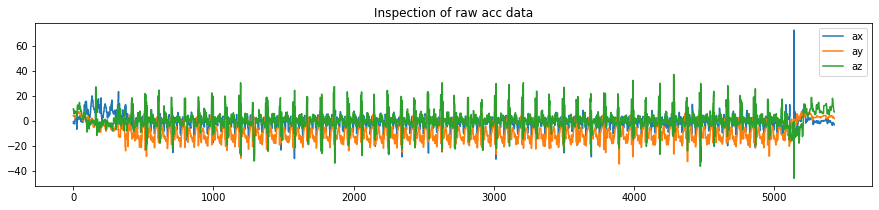

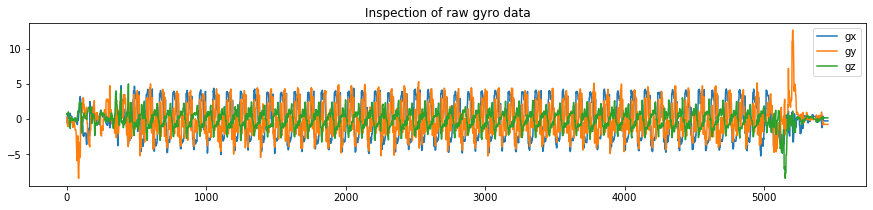

In [340]:
inspect_acc_gyro_data(raw_df1, raw_df2)

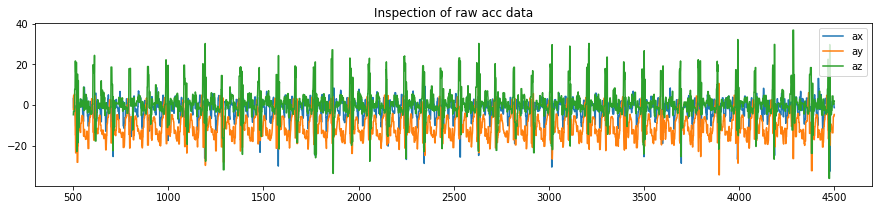

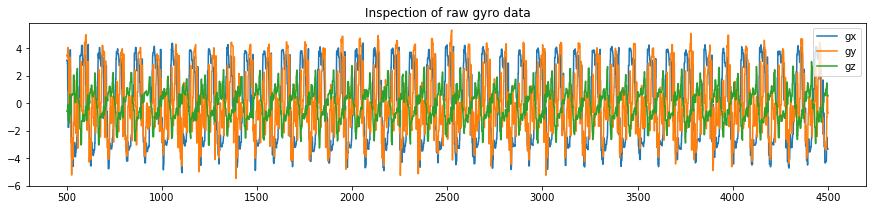

In [341]:
clean_df1, clean_df2 = remove_junk_data(raw_df1, raw_df2, lower=500, upper=4500)
inspect_acc_gyro_data(clean_df1, clean_df2)

In [342]:
save_changes(clean_df1, clean_df2)

Cleaned data written to:
data/cleaned/acc_gyro\walk_acc3.csv
data/cleaned/acc_gyro\walk_gyro3.csv


## Read data sets

In [383]:
X_acc_gyro, y_acc_gyro = read_acc_gyro_csvs()

In [389]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_acc_gyro, y_acc_gyro, test_size=0.2, random_state=42)

## Pairplot

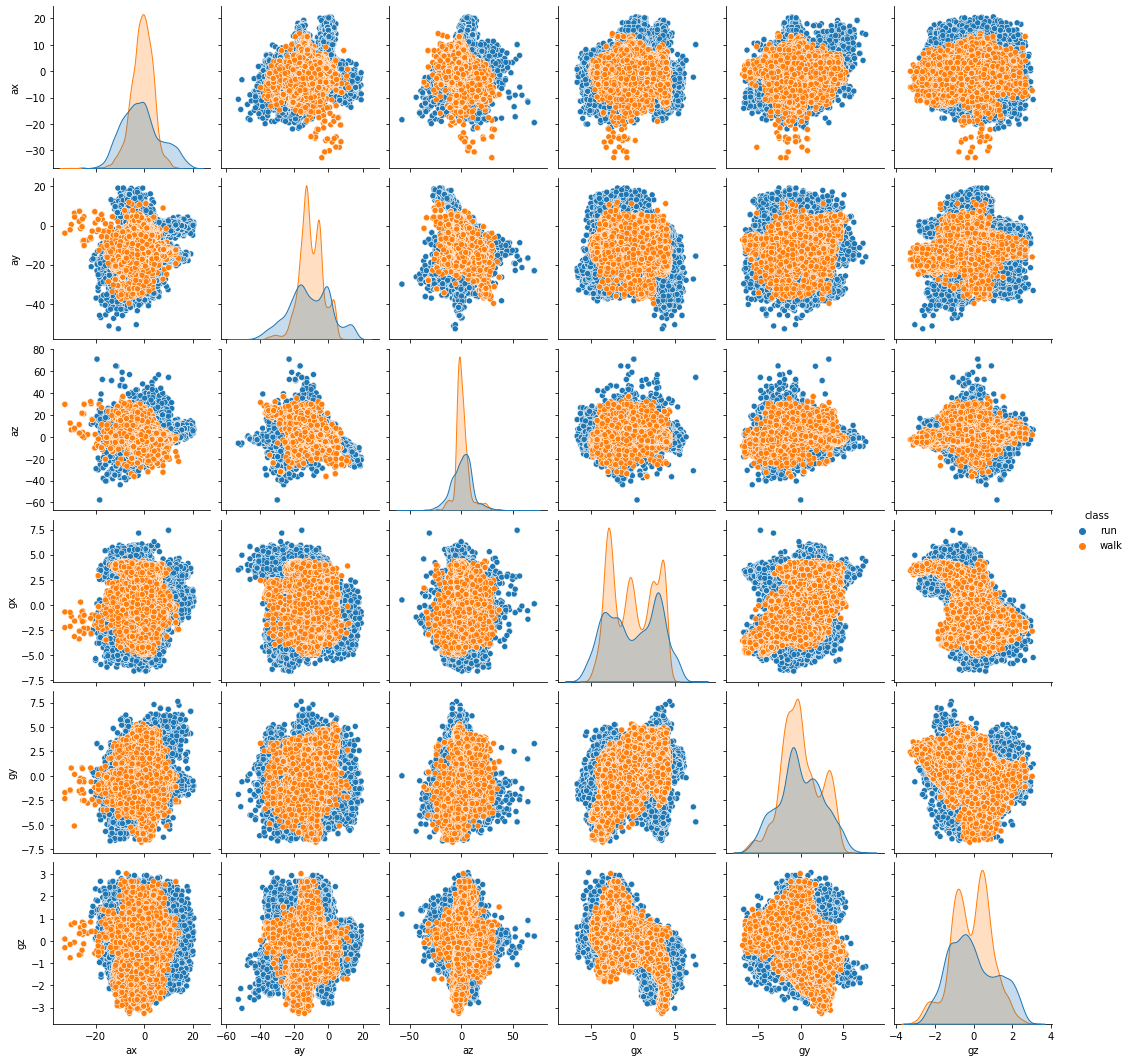

In [384]:
entire_set = pd.concat([X_acc_gyro, y_acc_gyro], axis=1)
sns.pairplot(entire_set, hue='class')